<a href="https://colab.research.google.com/github/CamilaKim/Study/blob/master/FNLP_Word2Vec_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FNLP_Word2Vec_Pytorch**


# Gensim

In [0]:
!pip install gensim

In [0]:
#https://towardsdatascience.com/word-embedding-with-word2vec-and-fasttext-a209c1d3e12c
import numpy as np
import os
from random import shuffle
import re
import urllib.request
import zipfile
import lxml.etree
#download the data
urllib.request.urlretrieve("https://wit3.fbk.eu/get.php?path=XML_releases/xml/ted_en-20160408.zip&filename=ted_en-20160408.zip", filename="ted_en-20160408.zip")
# extract subtitle
with zipfile.ZipFile('ted_en-20160408.zip', 'r') as z:
    doc = lxml.etree.parse(z.open('ted_en-20160408.xml', 'r'))
input_text = '\n'.join(doc.xpath('//content/text()'))
# remove parenthesis 
input_text_noparens = re.sub(r'\([^)]*\)', '', input_text)
# store as list of sentences
sentences_strings_ted = []
for line in input_text_noparens.split('\n'):
    m = re.match(r'^(?:(?P<precolon>[^:]{,20}):)?(?P<postcolon>.*)$', line)
    sentences_strings_ted.extend(sent for sent in m.groupdict()['postcolon'].split('.') if sent)
# store as list of lists of words
sentences_ted = []
for sent_str in sentences_strings_ted:
    tokens = re.sub(r"[^a-z0-9]+", " ", sent_str.lower()).split()    
    sentences_ted.append(tokens)
from gensim.models import Word2Vec
model_ted = Word2Vec(sentences=sentences_ted, size=100, window=5, min_count=5, workers=4, sg=0)
print(model_ted)

Word2Vec(vocab=21444, size=100, alpha=0.025)


In [0]:
print(input_text[:300])
print(input_text_noparens.split('\n')[:10])
print(sentences_strings_ted[:10])
print(sentences_ted[:10])

Here are two reasons companies fail: they only do more of the same, or they only do what's new.
To me the real, real solution to quality growth is figuring out the balance between two activities: exploration and exploitation. Both are necessary, but it can be too much of a good thing.
Consider Facit
["Here are two reasons companies fail: they only do more of the same, or they only do what's new.", 'To me the real, real solution to quality growth is figuring out the balance between two activities: exploration and exploitation. Both are necessary, but it can be too much of a good thing.', "Consider Facit. I'm actually old enough to remember them. Facit was a fantastic company. They were born deep in the Swedish forest, and they made the best mechanical calculators in the world. Everybody used them. And what did Facit do when the electronic calculator came along? They continued doing exactly the same. In six months, they went from maximum revenue ... and they were gone. Gone.", 'To me, th

***model_ted = Word2Vec(sentences=sentences_ted, size=100, window=5, min_count=5, workers=4, sg=0)***


The parameters:

> min_count = int - Ignores all words with total absolute frequency lower than this - (2, 100)

> window = int - The maximum distance between the current and predicted word within a sentence. E.g. window words on the left and window words on the left of our target - (2, 10)

> size = int - Dimensionality of the feature vectors. - (50, 300)

> sample = float - The threshold for configuring which higher-frequency words are randomly downsampled. Highly influencial. - (0, 1e-5)

> alpha = float - The initial learning rate - (0.01, 0.05)

> min_alpha = float - Learning rate will linearly drop to min_alpha as training progresses. To set it: alpha - (min_alpha * epochs) ~ 0.00

> negative = int - If > 0, negative sampling will be used, the int for negative specifies how many "noise words" should be drown. If set to 0, no negative sampling is used. - (5, 20)

> workers = int - Use these many worker threads to train the model (=faster training with multicore machines)

> sg=0 -> CBOW,  sg=1 -> Skip-gram

[gensim-word2vec-tutorial](https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial)

In [0]:
model_ted.wv.most_similar("birds")


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('animals', 0.8253463506698608),
 ('trees', 0.8173699378967285),
 ('rocks', 0.7838062047958374),
 ('bears', 0.7815128564834595),
 ('plants', 0.7564704418182373),
 ('corals', 0.7550895810127258),
 ('elephants', 0.7469815015792847),
 ('bees', 0.7403792142868042),
 ('landscapes', 0.7335201501846313),
 ('forests', 0.732998251914978)]

In [0]:
model_ted.wv.similarity('rainy', 'sunny')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.79946184

In [0]:
model_ted.wv.doesnt_match(['pollution', 'disaster', 'apple'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'apple'

Word2Vec(vocab=21444, size=100, alpha=0.025) head ['hand', 'leg']


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


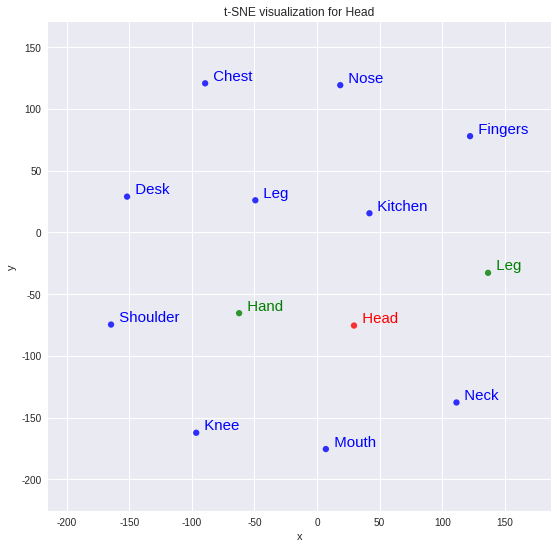

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd

def tsnescatterplot(model, word, list_names):
    print(model,word,list_names)
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 100), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
     # Reduces the dimensionality from 300 to 50 dimensions with PCA
#     reduc = PCA(n_components=50).fit_transform(arrays)
    reduc = PCA(n_components=1).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))
tsnescatterplot(model_ted, 'head',['hand','leg'])    

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


Word2Vec(vocab=21444, size=100, alpha=0.025) family ['quantum', 'raw', 'cheapest', 'generic', 'arcane', 'vertical', 'maps', 'profiling', 'neat', 'unexplored']


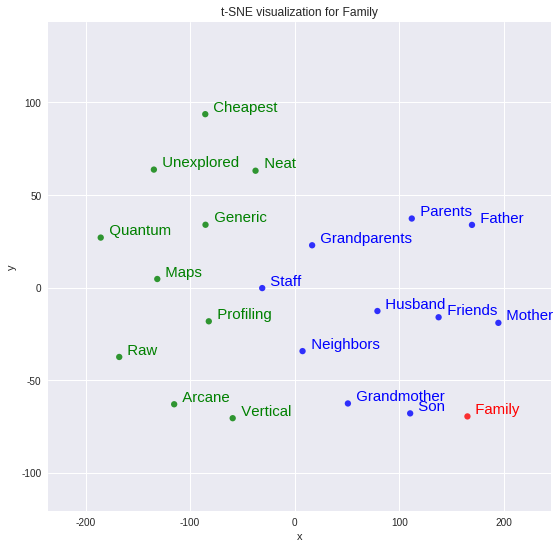

In [0]:
tsnescatterplot(model_ted, 'family', [i[0] for i in model_ted.wv.most_similar(negative=["family"])])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


Word2Vec(vocab=21444, size=100, alpha=0.025) head ['knee', 'seat', 'chair', 'finger', 'hair', 'bed', 'teeth', 'bedroom', 'shoulders', 'door']


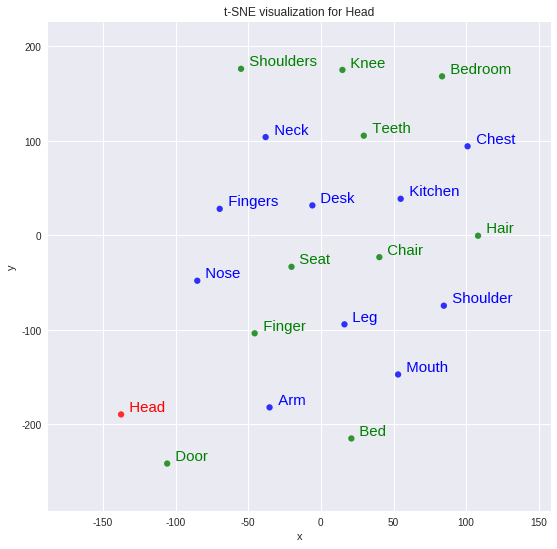

In [0]:
tsnescatterplot(model_ted, "head", [t[0] for t in model_ted.wv.most_similar(positive=["head"], topn=20)][10:])

In [0]:
def openlang(filename):
  f = open(filename+'.txt', 'r')
  sentences=[]
  line = f.readlines()
  for l in line:
    sentences.append(l)  
  f.close()
  return sentences
doc2=openlang('koenTed')

In [0]:
import numpy as np
import os
from random import shuffle
import re
import urllib.request
import zipfile
import lxml.etree
#download the data
input_text2 = ' '.join(doc2)
# remove parenthesis 
input_text2_noparens = re.sub(r'\([^)]*\)', '', input_text2)
# store as list of sentences
sentences_ted = []
for sent_str in input_text2_noparens.split('\n'):
    tokens = re.sub(r"[^a-z0-9ㄱ-힣]+", " ", sent_str.lower()).split()    
    sentences_ted.append(tokens)
from gensim.models import Word2Vec
model_ted = Word2Vec(sentences=sentences_ted, size=100, window=5, min_count=5, workers=4, sg=0)

In [0]:
print(input_text2_noparens.split('\n')[:10])
print(sentences_ted[:100])

['당신이 잡은 물고기는 얼마나 컸습니까? ', ' 이만큼 큽니까? ', ' 이만큼이요? ', ' 아니면 이만큼? ', ' 사진 증거가 없으면 ', ' 당신이 엄청나게 큰 물고기를  잡았다는 걸 증명할 길이 없죠. ', ' 낚시의 역사가 시작된 이래로 항상 그랬습니다. ', ' 사실, 수백년 전에, ', ' 사진으로 그 순간을 포착할 수 없던 그 옛날에, ', ' 일본 어부들은 자신들만의 방법을 발명하여 ']
[['당신이', '잡은', '물고기는', '얼마나', '컸습니까'], ['이만큼', '큽니까'], ['이만큼이요'], ['아니면', '이만큼'], ['사진', '증거가', '없으면'], ['당신이', '엄청나게', '큰', '물고기를', '잡았다는', '걸', '증명할', '길이', '없죠'], ['낚시의', '역사가', '시작된', '이래로', '항상', '그랬습니다'], ['사실', '수백년', '전에'], ['사진으로', '그', '순간을', '포착할', '수', '없던', '그', '옛날에'], ['일본', '어부들은', '자신들만의', '방법을', '발명하여'], ['대어를', '낚은', '것을', '기록했습니다'], ['일본인들은', '그', '방법을', '교타쿠', '라고', '부릅니다'], ['교타쿠는', '물고기를', '그리는', '고대', '미술인데요'], ['일본에서', '유래됐습니다'], ['현대의', '카메라가', '발명되기', '전에'], ['대어를', '낚는', '순간을', '기록하기', '위한', '방법이었죠'], ['교', '는', '물고기를', '뜻하고'], ['타쿠', '는', '인상을', '의미합니다'], ['교타쿠가', '어떻게', '시작됐는지에', '대해서는'], ['여러가지', '설이', '있습니다'], ['하지만', '기본적으로는', '어부들이'], ['자신이', '잡은', '물고기의', '종과', '크기를', '기록할', '수단이', '필요해서'], ['100여년', '전부터', '사용했습니다'], ['어부들은

In [0]:
model_ted.wv.most_similar('공공')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('시장', 0.9479732513427734),
 ('보건', 0.9461224675178528),
 ('건강', 0.9446510672569275),
 ('정보', 0.9420764446258545),
 ('정치', 0.9411664009094238),
 ('환경', 0.9409434795379639),
 ('산업', 0.9407810568809509),
 ('서비스', 0.9405919909477234),
 ('통신', 0.9390889406204224),
 ('정신', 0.9375384449958801)]

In [0]:
model_ted.wv.most_similar('컴퓨터')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('세포', 0.8759253621101379),
 ('뇌', 0.8597628474235535),
 ('로봇', 0.8529554605484009),
 ('인터넷', 0.8487515449523926),
 ('시스템', 0.8465430736541748),
 ('유전자', 0.8440530300140381),
 ('공학', 0.8346738815307617),
 ('조직', 0.8346558213233948),
 ('줄기', 0.8337825536727905),
 ('네트워크', 0.8307371139526367)]

In [0]:
#Install Korean font
#https://colab.research.google.com/github/nicewook/datascience_exercise/blob/master/korean_font_on_matplotlib.ipynb
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd

#Install Korean font2
import matplotlib.font_manager as fm 
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False # for minus marks
fm._rebuild()

NanumGothic Eco


# **Continuous Bag of Words**

In [1]:
#using GPU.
import torch
torch.cuda.is_available()

True

![대체 텍스트](https://upload.wikimedia.org/wikipedia/commons/a/a2/Cbow.png)

In [2]:
#https://srijithr.gitlab.io/post/word2vec/

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import urllib.request
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk import word_tokenize
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances

torch.manual_seed(1)

CONTEXT_SIZE = 3
EMBEDDING_DIM = 10

test_sentence = """Empathy for the poor may not come easily to people who never experienced it. They may blame the victims and insist their predicament can be overcome through determination and hard work.
But they may not realize that extreme poverty can be psychologically and physically incapacitating — a perpetual cycle of bad diets, health care and education exacerbated by the shaming and self-fulfilling prophecies that define it in the public imagination.
Gordon Parks — perhaps more than any artist — saw poverty as “the most savage of all human afflictions” and realized the power of empathy to help us understand it. It was neither an abstract problem nor political symbol, but something he endured growing up destitute in rural Kansas and having spent years documenting poverty throughout the world, including the United States.
That sensitivity informed “Freedom’s Fearful Foe: Poverty,” his celebrated photo essay published in Life magazine in June 1961. He took readers into the lives of a Brazilian boy, Flavio da Silva, and his family, who lived in the ramshackle Catacumba favela in the hills outside Rio de Janeiro. These stark photographs are the subject of a new book, “Gordon Parks: The Flavio Story” (Steidl/The Gordon Parks Foundation), which accompanies a traveling exhibition co-organized by the Ryerson Image Centre in Toronto, where it opens this week, and the J. Paul Getty Museum. Edited with texts by the exhibition’s co-curators, Paul Roth and Amanda Maddox, the book also includes a recent interview with Mr. da Silva and essays by Beatriz Jaguaribe, Maria Alice Rezende de Carvalho and Sérgio Burgi.
""".split()
# we should tokenize the input, but we will ignore that for now
# build a list of tuples.  Each tuple is ([ word_i-2, word_i-1 ], target word)

def get_key(word_id):
    for key,val in word_to_ix.items():
        if(val == word_id):
            print(key)

def cluster_embeddings(filename,nclusters):
    X = np.load(filename)
    kmeans = KMeans(n_clusters=nclusters, random_state=0).fit(X)
    center = kmeans.cluster_centers_
    distances = euclidean_distances(X,center)

    for i in np.arange(0,distances.shape[1]):
        word_id = np.argmin(distances[:,i])
        print(word_id)
        get_key(word_id)

def read_data(file_path):
    tokenizer = RegexpTokenizer(r'\w+')
    data = urllib.request.urlopen(file_path)
    data = data.read().decode('utf8')
    tokenized_data = word_tokenize(data)
    stop_words = set(stopwords.words('english'))
    stop_words.update(['.',',',':',';','(',')','#','--','...','"'])
    cleaned_words = [ i for i in tokenized_data if i not in stop_words ]
    return(cleaned_words)

#test_sentence = read_data('https://www.gutenberg.org/files/57884/57884-0.txt')

ngrams = []
for i in range(len(test_sentence) - CONTEXT_SIZE):
    tup = [test_sentence[j] for j in np.arange(i , i + CONTEXT_SIZE) ]
    ngrams.append((tup,test_sentence[i + CONTEXT_SIZE]))
# print the first 3, just so you can see what they look like


vocab = set(test_sentence)
print("Length of vocabulary",len(vocab))
word_to_ix = {word: i for i, word in enumerate(vocab)}


class CBOWModeler(nn.Module):

    def __init__(self, vocab_size, embedding_dim, context_size):
        super(CBOWModeler, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(context_size * embedding_dim, 128)
        self.linear2 = nn.Linear(128, vocab_size)

    def forward(self, inputs):
        embeds = self.embeddings(inputs).view((1, -1))  # -1 implies size inferred for that index from the size of the data
        #print(np.mean(np.mean(self.linear2.weight.data.numpy())))
        out1 = F.relu(self.linear1(embeds)) # output of first layer
        out2 = self.linear2(out1) # output of second layer
        log_probs = F.log_softmax(out2, dim=1)
        return log_probs

    def predict(self,input):
        context_idxs = torch.tensor([word_to_ix[w] for w in input], dtype=torch.long) 
        res = self.forward(context_idxs) 
        res_arg = torch.argmax(res)
        res_val, res_ind = res.sort(descending=True)
        res_val = res_val[0][:3] 
        res_ind = res_ind[0][:3] 
        for arg in zip(res_val,res_ind):
            print([(key,val,arg[0]) for key,val in word_to_ix.items() if val == arg[1]])

#     def freeze_layer(self,layer):
#         for name,child in model.named_children():
#             print(name,child)
#             if(name == layer):
#                 for names,params in child.named_parameters():
#                     print(names,params)
#                     print(params.size())
#                     params.requires_grad= False

    def print_layer_parameters(self):
        for name,child in model.named_children():
                print(name,child)
                for names,params in child.named_parameters():
                    print(names,params)
                    print(params.size())

    def write_embedding_to_file(self,filename):
        for i in self.embeddings.parameters():
            weights = i.data.numpy()
        np.save(filename,weights)



losses = []
loss_function = nn.NLLLoss()
model = CBOWModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE)
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Freeze embedding layer
# model.freeze_layer('embeddings')


for epoch in range(500):
    total_loss = 0
    #------- Embedding layers are trained as well here ----#
    #lookup_tensor = torch.tensor([word_to_ix["poor"]], dtype=torch.long)
    #hello_embed = model.embeddings(lookup_tensor)
    #print(hello_embed)
    # -----------------------------------------------------#

    for context, target in ngrams:

        # Step 1. Prepare the inputs to be passed to the model (i.e, turn the words
        # into integer indices and wrap them in tensors)
        context_idxs = torch.tensor([word_to_ix[w] for w in context], dtype=torch.long)
        
        # Step 2. Recall that torch *accumulates* gradients. Before passing in a
        # new instance, you need to zero out the gradients from the old
        # instance
        # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes
        model.zero_grad()

        # Step 3. Run the forward pass, getting log probabilities over next
        # words
        log_probs = model(context_idxs)
        #print(log_probs)

        # Step 4. Compute your loss function. (Again, Torch wants the target
        # word wrapped in a tensor)
        loss = loss_function(log_probs, torch.tensor([word_to_ix[target]], dtype=torch.long))
        #print(loss)

        # Step 5. Do the backward pass and update the gradient
        loss.backward()
        optimizer.step()

        # Get the Python number from a 1-element Tensor by calling tensor.item()
        total_loss += loss.item()
    print('total',total_loss)
    losses.append(total_loss)
# print('losses',losses)  # The loss decreased every iteration over the training data!

#Print the model layer parameters
print(model.print_layer_parameters())

#Predict the next word given n context words
model.predict(['of','all','human'])
model.write_embedding_to_file('embeddings.npy')
cluster_embeddings('embeddings.npy',2)

Length of vocabulary 195
total 1349.5488805770874
total 1341.0166034698486
total 1332.5900893211365
total 1324.2677111625671
total 1316.0376000404358
total 1307.8953619003296
total 1299.8298437595367
total 1291.8424890041351
total 1283.9322559833527
total 1276.0939545631409
total 1268.322156906128
total 1260.61701130867
total 1252.9829518795013
total 1245.4230346679688
total 1237.9486763477325
total 1230.5609242916107
total 1223.2549345493317
total 1216.0292828083038
total 1208.8866333961487
total 1201.8235664367676
total 1194.8301634788513
total 1187.9026057720184
total 1181.0344200134277
total 1174.2225439548492
total 1167.460349559784
total 1160.7325067520142
total 1154.037701845169
total 1147.3620038032532
total 1140.7017602920532
total 1134.0429618358612
total 1127.3816678524017
total 1120.705332994461
total 1114.011468410492
total 1107.300431728363
total 1100.566971540451
total 1093.8043382167816
total 1087.0158650875092
total 1080.1863493919373
total 1073.3179790973663
total 106

# **Skipgrams**

![대체 텍스트](https://upload.wikimedia.org/wikipedia/commons/9/95/Skip-gram.png)

In [7]:
#https://srijithr.gitlab.io/post/word2vec/

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import urllib.request
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk import word_tokenize
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances

torch.manual_seed(1)

CONTEXT_SIZE = 3
EMBEDDING_DIM = 10

def get_key(word_id):
    for key,val in word_to_ix.items():
        if(val == word_id):
            print(key)


def cluster_embeddings(filename,nclusters):
    X = np.load(filename)
    kmeans = KMeans(n_clusters=nclusters, random_state=0).fit(X)
    center = kmeans.cluster_centers_
    distances = euclidean_distances(X,center)

    for i in np.arange(0,distances.shape[1]):
        word_id = np.argmin(distances[:,i])
        print(word_id)
        get_key(word_id)

def read_data(file_path):
    tokenizer = RegexpTokenizer(r'\w+')
    data = urllib.request.urlopen(file_path)
    data = data.read().decode('utf8')
    tokenized_data = word_tokenize(data)
    stop_words = set(stopwords.words('english'))
    stop_words.update(['.',',',':',';','(',')','#','--','...','"'])
    cleaned_words = [ i for i in tokenized_data if i not in stop_words ]
    return(cleaned_words)


test_sentence = """Empathy for the poor may not come easily to people who never experienced it. They may blame the victims and insist their predicament can be overcome through determination and hard work.
But they may not realize that extreme poverty can be psychologically and physically incapacitating — a perpetual cycle of bad diets, health care and education exacerbated by the shaming and self-fulfilling prophecies that define it in the public imagination.
Gordon Parks — perhaps more than any artist — saw poverty as “the most savage of all human afflictions” and realized the power of empathy to help us understand it. It was neither an abstract problem nor political symbol, but something he endured growing up destitute in rural Kansas and having spent years documenting poverty throughout the world, including the United States.
That sensitivity informed “Freedom’s Fearful Foe: Poverty,” his celebrated photo essay published in Life magazine in June 1961. He took readers into the lives of a Brazilian boy, Flavio da Silva, and his family, who lived in the ramshackle Catacumba favela in the hills outside Rio de Janeiro. These stark photographs are the subject of a new book, “Gordon Parks: The Flavio Story” (Steidl/The Gordon Parks Foundation), which accompanies a traveling exhibition co-organized by the Ryerson Image Centre in Toronto, where it opens this week, and the J. Paul Getty Museum. Edited with texts by the exhibition’s co-curators, Paul Roth and Amanda Maddox, the book also includes a recent interview with Mr. da Silva and essays by Beatriz Jaguaribe, Maria Alice Rezende de Carvalho and Sérgio Burgi.
""".split()
# we should tokenize the input, but we will ignore that for now
# build a list of tuples.  Each tuple is ([ word_i-2, word_i-1 ], target word)

#test_sentence = read_data('https://www.gutenberg.org/files/57884/57884-0.txt')

ngrams = []
for i in range(len(test_sentence) - CONTEXT_SIZE):
    tup = [test_sentence[j] for j in np.arange(i + 1 , i + CONTEXT_SIZE + 1) ]
    ngrams.append((test_sentence[i],tup))
# print the first 3, just so you can see what they look like
#print(ngrams)


vocab = set(test_sentence)
print("Length of vocabulary",len(vocab))
word_to_ix = {word: i for i, word in enumerate(vocab)}


class SkipgramModeler(nn.Module):

    def __init__(self, vocab_size, embedding_dim, context_size):
        super(SkipgramModeler, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(embedding_dim, 128)
        self.linear2 = nn.Linear(128, context_size * vocab_size)
        #self.parameters['context_size'] = context_size

    def forward(self, inputs):
        embeds = self.embeddings(inputs).view((1, -1))  # -1 implies size inferred for that index from the size of the data
        #print(np.mean(np.mean(self.linear2.weight.data.numpy())))
        out1 = F.relu(self.linear1(embeds)) # output of first layer
        out2 = self.linear2(out1)           # output of second layer
        #print(embeds)
        log_probs = F.log_softmax(out2, dim=1).view(CONTEXT_SIZE,-1)
        return log_probs

    def predict(self,input):
        context_idxs = torch.tensor([word_to_ix[input]], dtype=torch.long)
        res = self.forward(context_idxs)
        res_arg = torch.argmax(res)
        res_val, res_ind = res.sort(descending=True)
        indices = [res_ind[i][0] for i in np.arange(0,3)]
#         for arg in indices:
#             print( [ (key, val) for key,val in word_to_ix.items() if val == arg ])


#     def freeze_layer(self,layer):
#         for name,child in model.named_children():
#             print(name,child)
#             if(name == layer):
#                 for names,params in child.named_parameters():
#                     print(names,params)
#                     print(params.size())
#                     params.requires_grad= False

    def print_layer_parameters(self):
        for name,child in model.named_children():
                print(name,child)
                for names,params in child.named_parameters():
                    print(names,params)
                    print(params.size())

    def write_embedding_to_file(self,filename):
        for i in self.embeddings.parameters():
            weights = i.data.numpy()
        np.save(filename,weights)


losses = []
loss_function = nn.NLLLoss()
model = SkipgramModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE)
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Freeze embedding layer
#model.freeze_layer('embeddings')

for epoch in range(550):
    total_loss = 0
    #------- Embedding layers are trained as well here ----#
    #lookup_tensor = torch.tensor([word_to_ix["poor"]], dtype=torch.long)
    #hello_embed = model.embeddings(lookup_tensor)
    #print(hello_embed)
    # -----------------------------------------------------#

    model.predict('psychologically')

    for context, target in ngrams:

        # Step 1. Prepare the inputs to be passed to the model (i.e, turn the words
        # into integer indices and wrap them in tensors)
        #print(context,target)


        context_idxs = torch.tensor([word_to_ix[context]], dtype=torch.long)
        #print("Context id",context_idxs)

        # Step 2. Recall that torch *accumulates* gradients. Before passing in a
        # new instance, you need to zero out the gradients from the old
        # instance
        model.zero_grad()

        # Step 3. Run the forward pass, getting log probabilities over next
        # words
        log_probs = model(context_idxs)
        #print(log_probs)

        # Step 4. Compute your loss function. (Again, Torch wants the target
        # word wrapped in a tensor)
        target_list = torch.tensor([word_to_ix[w] for w in target], dtype=torch.long)
        loss = loss_function(log_probs, target_list)
        #print(loss)

        # Step 5. Do the backward pass and update the gradient
        loss.backward()
        optimizer.step()

        # Get the Python number from a 1-element Tensor by calling tensor.item()
        total_loss += loss.item()
    print(total_loss)
    losses.append(total_loss)
#print(losses)  # The loss decreased every iteration over the training data!

#Print the model layer parameters
#model.print_layer_parameters()

#Predict the next word given n context words
model.predict('psychologically')
model.write_embedding_to_file('embeddings_skipgrams.npy')
cluster_embeddings('embeddings_skipgrams.npy',5)

Length of vocabulary 195
1638.4615502357483
1635.9240007400513
1633.403148651123
1630.8984184265137
1628.4083499908447
1625.9311332702637
1623.4669008255005
1621.0151329040527
1618.5751128196716
1616.1457662582397
1613.7263226509094
1611.315972328186
1608.9144911766052
1606.5211324691772
1604.1355395317078
1601.7573890686035
1599.385597229004
1597.0204801559448
1594.661952972412
1592.309163570404
1589.9618310928345
1587.6193866729736
1585.2817578315735
1582.9486985206604
1580.6201753616333
1578.296314239502
1575.9768886566162
1573.6614785194397
1571.3503098487854
1569.0439100265503
1566.7426753044128
1564.4461741447449
1562.1548705101013
1559.8684539794922
1557.5869545936584
1555.310601234436
1553.0399689674377
1550.7757172584534
1548.5182428359985
1546.2681169509888
1544.0264735221863
1541.7934303283691
1539.568899154663
1537.353190422058
1535.1466813087463
1532.9497385025024
1530.7628536224365
1528.58642911911
1526.4202723503113
1524.264654636383
1522.1196756362915
1519.9856386184692

# **In Detail**

*[pytorch library]* (https://github.com/pytorch/pytorch)

*[pytorch tutorial]* (https://tutorials.pytorch.kr/beginner/nlp/word_embeddings_tutorial.html)

1.  **Continuous Bag of Words_In Detail**

In [16]:
import numpy as np
CONTEXT_SIZE = 3
EMBEDDING_DIM = 10

#string to list
test_sentence = """Empathy for the poor may not come easily to people who never experienced it. They may blame the victims and insist their predicament can be overcome through determination and hard work.
But they may not realize that extreme poverty can be psychologically and physically incapacitating — a perpetual cycle of bad diets, health care and education exacerbated by the shaming and self-fulfilling prophecies that define it in the public imagination.
Gordon Parks — perhaps more than any artist — saw poverty as “the most savage of all human afflictions” and realized the power of empathy to help us understand it. It was neither an abstract problem nor political symbol, but something he endured growing up destitute in rural Kansas and having spent years documenting poverty throughout the world, including the United States.
That sensitivity informed “Freedom’s Fearful Foe: Poverty,” his celebrated photo essay published in Life magazine in June 1961. He took readers into the lives of a Brazilian boy, Flavio da Silva, and his family, who lived in the ramshackle Catacumba favela in the hills outside Rio de Janeiro. These stark photographs are the subject of a new book, “Gordon Parks: The Flavio Story” (Steidl/The Gordon Parks Foundation), which accompanies a traveling exhibition co-organized by the Ryerson Image Centre in Toronto, where it opens this week, and the J. Paul Getty Museum. Edited with texts by the exhibition’s co-curators, Paul Roth and Amanda Maddox, the book also includes a recent interview with Mr. da Silva and essays by Beatriz Jaguaribe, Maria Alice Rezende de Carvalho and Sérgio Burgi.
""".split()
print(test_sentence[0:10])
print("test_sentence 길이: ",len(test_sentence),", context_size 길이: ",CONTEXT_SIZE)
print("i의 범위: 0부터 ~", len(test_sentence)-CONTEXT_SIZE)
 
CONTEXT_SIZE = 3
ngrams = []
for i in range(len(test_sentence) - CONTEXT_SIZE):
    tup = [test_sentence[j] for j in np.arange(i , i + CONTEXT_SIZE) ]
    ngrams.append((tup,test_sentence[i + CONTEXT_SIZE]))
print(ngrams[:3])

['Empathy', 'for', 'the', 'poor', 'may', 'not', 'come', 'easily', 'to', 'people']
test_sentence 길이:  259 , context_size 길이:  3
i의 범위: 0부터 ~ 256
[(['Empathy', 'for', 'the'], 'poor'), (['for', 'the', 'poor'], 'may'), (['the', 'poor', 'may'], 'not')]


In [17]:
#python에서의 set:중복제거 및 순서섞기
vocab = set(test_sentence)
print("Length of vocabulary",len(vocab))
#python에서의 dictionary:중복제거 및 순서섞기,pair유지
word_to_ix = {word: i for i, word in enumerate(vocab)}
print(word_to_ix)

Length of vocabulary 195
{'exacerbated': 0, 'most': 1, 'book,': 2, 'Foundation),': 3, 'neither': 4, 'this': 5, 'power': 6, 'essay': 7, 'Amanda': 8, 'Maria': 9, 'published': 10, 'an': 11, 'public': 12, 'political': 13, 'That': 14, 'Burgi.': 15, 'up': 16, 'cycle': 17, 'boy,': 18, 'savage': 19, 'shaming': 20, 'which': 21, 'Jaguaribe,': 22, 'determination': 23, 'poverty': 24, 'hills': 25, 'perpetual': 26, 'including': 27, 'co-curators,': 28, 'informed': 29, 'Empathy': 30, 'Paul': 31, 'Museum.': 32, 'artist': 33, 'includes': 34, 'Beatriz': 35, 'Life': 36, 'easily': 37, 'people': 38, 'more': 39, '“the': 40, 'Fearful': 41, 'diets,': 42, 'but': 43, 'photographs': 44, 'with': 45, 'in': 46, 'experienced': 47, 'help': 48, 'blame': 49, 'States.': 50, 'Maddox,': 51, 'Story”': 52, 'world,': 53, 'They': 54, 'through': 55, 'health': 56, 'Sérgio': 57, 'may': 58, 'J.': 59, 'be': 60, 'empathy': 61, 'It': 62, 'Gordon': 63, 'something': 64, 'ramshackle': 65, 'predicament': 66, 'stark': 67, 'rural': 68, 'of

![대체 텍스트](https://ljvmiranda921.github.io/assets/png/cs231n-ann/neg_log.png)

In [0]:
import torch
import torch.nn as nn

losses = []
loss_function = nn.NLLLoss()
model = CBOWModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE)
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [0]:
print(len(vocab))
print(model.forward(context_idxs))

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import urllib.request
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk import word_tokenize
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances

class CBOWModeler(nn.Module):

    def __init__(self, vocab_size, embedding_dim, context_size):
        super(CBOWModeler, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim) #[195, 10]
        self.linear1 = nn.Linear(context_size * embedding_dim, 128) #[30, 128]
        self.linear2 = nn.Linear(128, vocab_size) #[128,195]

    def forward(self, inputs):
        embeds = self.embeddings(inputs).view((1, -1))  # -1 implies size inferred for that index from the size of the data
        #torch.Size([3, 10]) ----> torch.Size([1, 30])
        #         print(np.mean(np.mean(self.linear2.weight.data.numpy())))
        out1 = F.relu(self.linear1(embeds)) #[1,128]  # output of first layer 
        out2 = self.linear2(out1) #[1,195]   # output of second layer 
        log_probs = F.log_softmax(out2, dim=1)
        return log_probs

    def predict(self,input):
        context_idxs = torch.tensor([word_to_ix[w] for w in input], dtype=torch.long) #input == ['of', 'all', 'human']
        res = self.forward(context_idxs)
        res_arg = torch.argmax(res) #tensor(184)
        res_val, res_ind = res.sort(descending=True)
        res_val = res_val[0][:3] #tensor([-0.0147, -5.5025, -6.0342])
        res_ind = res_ind[0][:3] #tensor([83, 18,  7])
#         for arg in zip(res_val,res_ind):
            #print(arg)
#             print([(key,val,arg[0]) for key,val in word_to_ix.items() if val == arg[1]]) 
              #[('afflictions”', 184, tensor(-0.0361, grad_fn=<SelectBackward>))]
              #[('and', 86, tensor(-4.5022, grad_fn=<SelectBackward>))]
              #[('Brazilian', 169, tensor(-5.9691, grad_fn=<SelectBackward>)]

#     def freeze_layer(self,layer):
#         for name,child in model.named_children():
#             print(name,child)
#             if(name == layer):
#                 for names,params in child.named_parameters():
#                     print(names,params)
#                     print(params.size())
#                     params.requires_grad= False

    def print_layer_parameters(self):
        for name,child in model.named_children():
                print(name,child)
                for names,params in child.named_parameters():
                    print(names,params)
                    print(params.size())

    def write_embedding_to_file(self,filename):
        for i in self.embeddings.parameters():
            weights = i.data.numpy()
        np.save(filename,weights)

In [24]:
for i in model.embeddings.parameters():
  print(i.data.numpy())

[[-1.629781   -0.78158975 -0.6731153  ... -1.6852072  -0.7390124
   0.3055563 ]
 [-0.80979836 -0.2985051  -0.22850177 ... -1.2276492   0.74952847
   0.22642034]
 [ 0.8866281   0.26704207 -0.66539377 ... -1.4820443   0.03474152
  -0.645877  ]
 ...
 [ 0.41772202 -0.15746632  1.4923147  ...  0.84195226  0.7695329
   0.30093455]
 [-0.00277828  0.37276897  0.39554164 ...  0.61711174  0.5512562
   0.46243757]
 [ 0.09873401 -1.653412   -0.33252206 ...  0.8537746  -1.0184102
  -1.2885967 ]]


In [0]:
for epoch in range(400):
    total_loss = 0
    #------- Embedding layers are trained as well here ----#
    #lookup_tensor = torch.tensor([word_to_ix["poor"]], dtype=torch.long)
    #hello_embed = model.embeddings(lookup_tensor)
    #print(hello_embed)
    # -----------------------------------------------------#

    for context, target in ngrams:
        #e.g.)context==[‘Empathy’,’for’,’the’], target==poor ...

        # Step 1. Prepare the inputs to be passed to the model (i.e, turn the words
        # into integer indices and wrap them in tensors)
        context_idxs = torch.tensor([word_to_ix[w] for w in context], dtype=torch.long)        
        #e.g.)context_idxs == Tensor([30,132,180])...

        # Step 2. Recall that torch *accumulates* gradients. Before passing in a
        # new instance, you need to zero out the gradients from the old
        # instance
        model.zero_grad()

        # Step 3. Run the forward pass, getting log probabilities over next
        # words
        log_probs = model(context_idxs)
#         print(log_probs)

        # Step 4. Compute your loss function. (Again, Torch wants the target
        # word wrapped in a tensor)
        loss = loss_function(log_probs, torch.tensor([word_to_ix[target]], dtype=torch.long))
        #print(loss)

        # Step 5. Do the backward pass and update the gradient
        loss.backward()
        optimizer.step()

        # Get the Python number from a 1-element Tensor by calling tensor.item()
        total_loss += loss.item()
    print(total_loss)
    losses.append(total_loss)
#print(losses)  # The loss decreased every iteration over the training data!

#Print the model layer parameters
#model.print_layer_parameters()

#Predict the next word given n context words
model.predict(['of','all','human'])
model.write_embedding_to_file('embeddings.npy')
cluster_embeddings('embeddings.npy',2)

2. **Skipgram_In Detail**

In [8]:
#https://srijithr.gitlab.io/post/word2vec/

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import urllib.request
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk import word_tokenize
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances

torch.manual_seed(1)

CONTEXT_SIZE = 3
EMBEDDING_DIM = 10

def get_key(word_id):
    for key,val in word_to_ix.items():
        if(val == word_id):
            print(key)


def cluster_embeddings(filename,nclusters):
    X = np.load(filename)
    kmeans = KMeans(n_clusters=nclusters, random_state=0).fit(X)
    center = kmeans.cluster_centers_
    distances = euclidean_distances(X,center)

    for i in np.arange(0,distances.shape[1]):
        word_id = np.argmin(distances[:,i])
        print(word_id)
        get_key(word_id)

def read_data(file_path):
    tokenizer = RegexpTokenizer(r'\w+')
    data = urllib.request.urlopen(file_path)
    data = data.read().decode('utf8')
    tokenized_data = word_tokenize(data)
    stop_words = set(stopwords.words('english'))
    stop_words.update(['.',',',':',';','(',')','#','--','...','"'])
    cleaned_words = [ i for i in tokenized_data if i not in stop_words ]
    return(cleaned_words)


test_sentence = """Empathy for the poor may not come easily to people who never experienced it. They may blame the victims and insist their predicament can be overcome through determination and hard work.
But they may not realize that extreme poverty can be psychologically and physically incapacitating — a perpetual cycle of bad diets, health care and education exacerbated by the shaming and self-fulfilling prophecies that define it in the public imagination.
Gordon Parks — perhaps more than any artist — saw poverty as “the most savage of all human afflictions” and realized the power of empathy to help us understand it. It was neither an abstract problem nor political symbol, but something he endured growing up destitute in rural Kansas and having spent years documenting poverty throughout the world, including the United States.
That sensitivity informed “Freedom’s Fearful Foe: Poverty,” his celebrated photo essay published in Life magazine in June 1961. He took readers into the lives of a Brazilian boy, Flavio da Silva, and his family, who lived in the ramshackle Catacumba favela in the hills outside Rio de Janeiro. These stark photographs are the subject of a new book, “Gordon Parks: The Flavio Story” (Steidl/The Gordon Parks Foundation), which accompanies a traveling exhibition co-organized by the Ryerson Image Centre in Toronto, where it opens this week, and the J. Paul Getty Museum. Edited with texts by the exhibition’s co-curators, Paul Roth and Amanda Maddox, the book also includes a recent interview with Mr. da Silva and essays by Beatriz Jaguaribe, Maria Alice Rezende de Carvalho and Sérgio Burgi.
""".split()
# we should tokenize the input, but we will ignore that for now
# build a list of tuples.  Each tuple is ([ word_i-2, word_i-1 ], target word)

#test_sentence = read_data('https://www.gutenberg.org/files/57884/57884-0.txt')

ngrams = []
for i in range(len(test_sentence) - CONTEXT_SIZE):
    tup = [test_sentence[j] for j in np.arange(i + 1 , i + CONTEXT_SIZE + 1) ]
    ngrams.append((test_sentence[i],tup))
# print the first 3, just so you can see what they look like
#print(ngrams)


vocab = set(test_sentence)
print("Length of vocabulary",len(vocab))
word_to_ix = {word: i for i, word in enumerate(vocab)}


class SkipgramModeler(nn.Module):

    def __init__(self, vocab_size, embedding_dim, context_size):
        super(SkipgramModeler, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim) #[195,10]
        self.linear1 = nn.Linear(embedding_dim, 128) #[10,128]
        self.linear2 = nn.Linear(128, context_size * vocab_size) #[128,3*195=585]
        #self.parameters['context_size'] = context_size

    def forward(self, inputs):
        embeds = self.embeddings(inputs).view((1, -1))  # -1 implies size inferred for that index from the size of the data #[1,10]
        #print(np.mean(np.mean(self.linear2.weight.data.numpy())))
        out1 = F.relu(self.linear1(embeds)) # output of first layer #[1,128]
        out2 = self.linear2(out1)# output of second [1,585]
        log_probs = F.log_softmax(out2, dim=1).view(CONTEXT_SIZE,-1)  #[3,195]
        return log_probs

    def predict(self,input): #input=='psychologically'
        context_idxs = torch.tensor([word_to_ix[input]], dtype=torch.long) # tensor([125])
        res = self.forward(context_idxs)
        res_arg = torch.argmax(res)
        res_val, res_ind = res.sort(descending=True)
        indices = [res_ind[i][0] for i in np.arange(0,3)]
#         print(indices) e.g.)[tensor(77), tensor(37), tensor(158)]        
#         for arg in indices:
#             print( [ (key, val) for key,val in word_to_ix.items() if val == arg ])    #[(‘people’,77)][(‘their’,37)][(‘a’,158)]


#     def freeze_layer(self,layer):
#         for name,child in model.named_children():
#             print(name,child)
#             if(name == layer):
#                 for names,params in child.named_parameters():
#                     print(names,params)
#                     print(params.size())
#                     params.requires_grad= False

    def print_layer_parameters(self):
        for name,child in model.named_children():
                print(name,child)
                for names,params in child.named_parameters():
                    print(names,params)
                    print(params.size())

    def write_embedding_to_file(self,filename):
        for i in self.embeddings.parameters():
            weights = i.data.numpy()
        np.save(filename,weights)


losses = []
loss_function = nn.NLLLoss()
model = SkipgramModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE)
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Freeze embedding layer
#model.freeze_layer('embeddings')

for epoch in range(550):
    total_loss = 0
    #------- Embedding layers are trained as well here ----#
    #lookup_tensor = torch.tensor([word_to_ix["poor"]], dtype=torch.long)
    #hello_embed = model.embeddings(lookup_tensor)
    #print(hello_embed)
    # -----------------------------------------------------#

    model.predict('psychologically')

    for context, target in ngrams:

        # Step 1. Prepare the inputs to be passed to the model (i.e, turn the words
        # into integer indices and wrap them in tensors) 
#         print(context,target) e.g.)context == Empathy, target == ['for', 'the', 'poor']

        context_idxs = torch.tensor([word_to_ix[context]], dtype=torch.long)
#         print("Context id",context_idxs) # Context id tensor([42])

        # Step 2. Recall that torch *accumulates* gradients. Before passing in a
        # new instance, you need to zero out the gradients from the old
        # instance
        model.zero_grad()

        # Step 3. Run the forward pass, getting log probabilities over next
        # words
        log_probs = model(context_idxs)
#         print(log_probs)

        # Step 4. Compute your loss function. (Again, Torch wants the target
        # word wrapped in a tensor)
        target_list = torch.tensor([word_to_ix[w] for w in target], dtype=torch.long) #e.g.) tensor([192, 180,  67])
        loss = loss_function(log_probs, target_list)
#         print(loss)

        # Step 5. Do the backward pass and update the gradient
        loss.backward()
        optimizer.step()

        # Get the Python number from a 1-element Tensor by calling tensor.item()
        total_loss += loss.item()
    print(total_loss)
    losses.append(total_loss)
#print(losses)  # The loss decreased every iteration over the training data!

# Print the model layer parameters
print(model.print_layer_parameters())

#Predict the next word given n context words
model.predict('psychologically')
model.write_embedding_to_file('embeddings_skipgrams.npy')
cluster_embeddings('embeddings_skipgrams.npy',5)

Length of vocabulary 195
1638.4615502357483
1635.9240007400513
1633.403148651123
1630.8984184265137
1628.4083499908447
1625.9311332702637
1623.4669008255005
1621.0151329040527
1618.5751128196716
1616.1457662582397
1613.7263226509094
1611.315972328186
1608.9144911766052
1606.5211324691772
1604.1355395317078
1601.7573890686035
1599.385597229004
1597.0204801559448
1594.661952972412
1592.309163570404
1589.9618310928345
1587.6193866729736
1585.2817578315735
1582.9486985206604
1580.6201753616333
1578.296314239502
1575.9768886566162
1573.6614785194397
1571.3503098487854
1569.0439100265503
1566.7426753044128
1564.4461741447449
1562.1548705101013
1559.8684539794922
1557.5869545936584
1555.310601234436
1553.0399689674377
1550.7757172584534
1548.5182428359985
1546.2681169509888
1544.0264735221863
1541.7934303283691
1539.568899154663
1537.353190422058
1535.1466813087463
1532.9497385025024
1530.7628536224365
1528.58642911911
1526.4202723503113
1524.264654636383
1522.1196756362915
1519.9856386184692

# Reference

>** 1. Gensim**

>> 1) Overall :https://towardsdatascience.com/word-embedding-with-word2vec-and-fasttext-a209c1d3e12c 

>> 2) gensim.word2vec usuage  :https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial

>> 3) Korean Ted Scripts :https://www.ted.com/talks?sort=newest&language=ko

>>4) Install Korean On Matplotlib :https://colab.research.google.com/github/nicewook/datascience_exercise/blob/master/korean_font_on_matplotlib.ipynb


>** 2. Continuous Bag of Words/Skipgrams**

>> 1) Overall :https://srijithr.gitlab.io/post/word2vec/

>** 3. In Datail**

> >1) Pytorch Library :https://github.com/pytorch/pytorch

>> 2) Pytorch Tutorial :https://tutorials.pytorch.kr/beginner/nlp/word_embeddings_tutorial.html